In [1]:
import histogram_manager as hm
import utils
import stage2
import numpy as np
import ROOT
from scipy import special

Welcome to JupyROOT 6.28/00


In [2]:
det_map = utils.load_det_map("../data/run_info_La.toml")
det_angle = det_map["angle"]

hists1 = hm.HistogramManager('../output/2023may_La_1.root')

print(hists1)

<HistogramManager(filename='../output/2023may_La_1.root', total_objects=160)>


Name         | Type  
----------------------
hEgam        | 📂 TH1D
hEn          | 📂 TH1D
hEn_gate5098 | 📂 TH1D
hEn_gate5126 | 📂 TH1D
hEn_gate5161 | 📂 TH1D


In [3]:
# hists1.rebin("hEn_gate5126", 1000)
hists1.rebin_in_place("hEn_gate5126", 1000)
hists1.add_by_angle('hEn_gate5126',det_angle)

hists1.subtract_background("hEn_gate5126",.3,25)
hists1.add_by_angle('hEn_gate5126_bkgsub',det_angle)

print(hists1)

<HistogramManager(filename='../output/2023may_La_1.root', total_objects=238)>


Name                      | Type  
-----------------------------------
hEgam                     | 📂 TH1D
hEn                       | 📂 TH1D
hEn_gate5098              | 📂 TH1D
hEn_gate5126              | 📂 TH1D
hEn_gate5126_angle        | 📂 TH1D
hEn_gate5126_bkg          | 📂 TH1D
hEn_gate5126_bkgsub       | 📂 TH1D
hEn_gate5126_bkgsub_angle | 📂 TH1D
hEn_gate5161              | 📂 TH1D


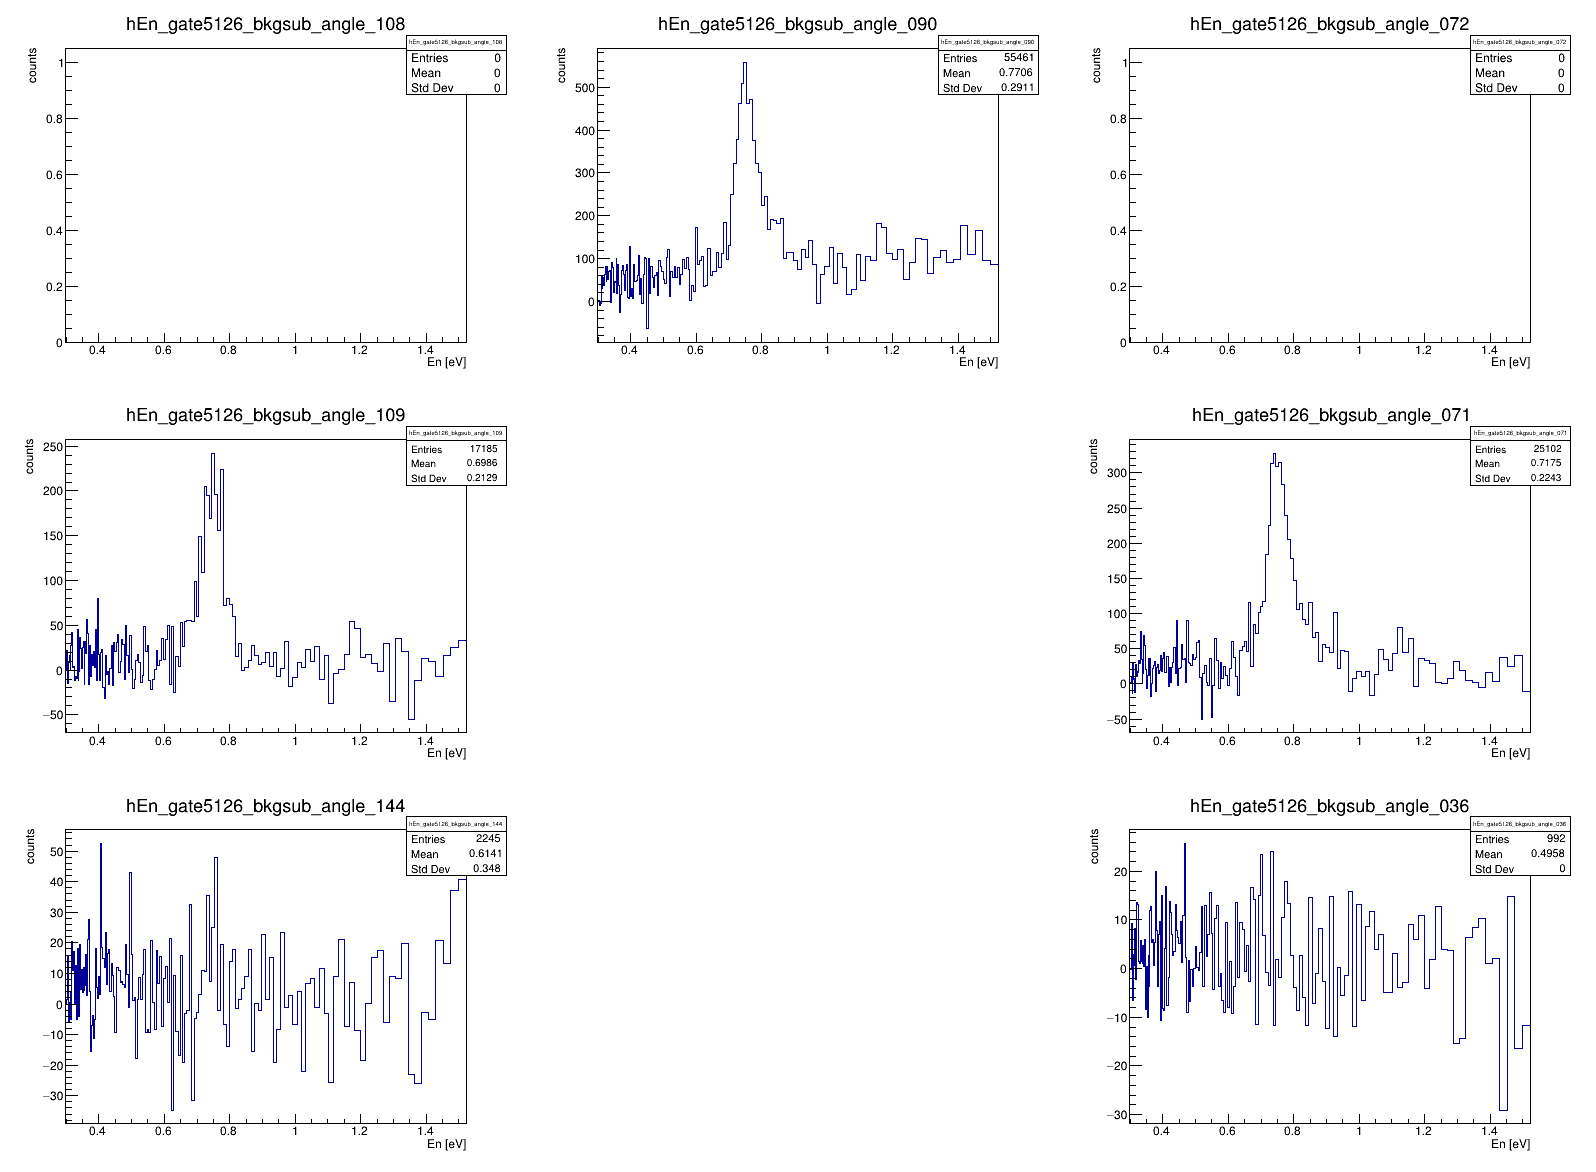

In [4]:
%jsroot off

# c = hists_all.plot_by_angle('hEn_gate_FA_beamcorr_pucorr_bkgsub_angle',13.752-1,13.752+1,50)
# c2 = hists_all.plot_by_angle('hEn_beamcorr_pucorr_angle',13.752-1,13.752+1,25)
# c.Draw()
# c2.Draw()

c = hists1.plot_by_angle("hEn_gate5126_angle",.3,3)
c = hists1.plot_by_angle("hEn_gate5126_bkgsub_angle",.3,1.5)
c.Draw()

# c2 = hists1.plot_folder("hEgam",6500,6800)
# c2.Draw()



In [5]:
# %jsroot on

# c = ROOT.TCanvas()
# hist = hists1.get("hEn_gateFASE_beamcorr_pucorr_angle_144")
# hist = hist.Clone()
# hist.Rebin(50)
# hist.Draw()
# hist.GetXaxis().SetRangeUser(3.5,5.5)
# hist_bkg = hist.ShowBackground(40,"same")
# hist_bkgsub = hist - hist_bkg
# hist_bkgsub.Draw("same")
# hist_bkgsub.SetLineColor(ROOT.kGreen)
# c.Draw()

In [6]:
%jsroot on

A_LH_angle, dA_LH_angle = hists1.calc_A_LH("hEn_gate5126_bkgsub_angle",0.745,0.05) #4.64


print(A_LH_angle)
print(dA_LH_angle)

# print(det_angle1)
# A_LH_angle = np.array(A_LH_angle)

angle = np.array([36,71,72,90,108,109,144])
# angle = np.array(det_angle1)

cos_angle = np.cos(np.pi/180*angle)
# print(cos_angle)

not_nan_indices = ~np.isnan(A_LH_angle)
A_LH_angle = A_LH_angle[not_nan_indices]
dA_LH_angle = dA_LH_angle[not_nan_indices]
cos_angle = cos_angle[not_nan_indices]

# not_zero_indices =  np.nonzero(dA_LH_angle)
# A_LH_angle = A_LH_angle[not_zero_indices]
# dA_LH_angle = dA_LH_angle[not_zero_indices]
# cos_angle = cos_angle[not_zero_indices]

dA_LH_angle [dA_LH_angle  == 0] = 1e-10


print(A_LH_angle)



A_LH_graph = stage2.create_A_LH_graph(cos_angle, A_LH_angle, dy = dA_LH_angle)
stage2.linear_fit_and_plot(A_LH_graph)

# slope, error, prob = stage2.linear_fit(A_LH_graph)
# 1/2 * (1 - ROOT.TMath.Erf(slope/np.sqrt(2)/error))


[ 0.32586524 -0.27767219         nan -0.29256262         nan -0.16450186
 -0.19150352]
[0.09560382 0.01781027        nan 0.01403932        nan 0.02230839
 0.08628119]
[ 0.32586524 -0.27767219 -0.29256262 -0.16450186 -0.19150352]


/Users/cauton/projects/annri-analysis-framework/src/histogram_manager.py:467: RuntimeWarning: invalid value encountered in divide
  return (N_L - N_H) / (N_L + N_H)
/Users/cauton/projects/annri-analysis-framework/src/histogram_manager.py:472: RuntimeWarning: invalid value encountered in divide
  return 2 * np.sqrt((N_L * N_L * N_H + N_L * N_H * N_H)) / (N_L + N_H) / (N_L + N_H)


(<cppyy.gbl.TCanvas object at 0x28c8b1370>, -0.05423785502587967)

In [7]:
xvals= np.arange(0.3, 30, 0.01)
# xval= np.arange(4.4, 5.4, 0.01)

angle = np.array([36,71,72,90,108,109,144])

xval = []
yval = []
y_prob = []
yerr = []

for x in xvals:
    
    cos_angle = np.cos(np.pi/180*angle)
    A_LH_angle, dA_LH_angle = hists1.calc_A_LH("hEn_gate5126_bkgsub_angle",x,0.05)
    # print(len(A_LH_angle))
    
    
    not_nan_indices = ~np.isnan(A_LH_angle)
    A_LH_angle = A_LH_angle[not_nan_indices]
    dA_LH_angle = dA_LH_angle[not_nan_indices]
    cos_angle = cos_angle[not_nan_indices]  
    
    # not_zero_indices =  np.nonzero(dA_LH_angle)
    # A_LH_angle = A_LH_angle[not_zero_indices]
    # dA_LH_angle = dA_LH_angle[not_zero_indices]
    # cos_angle = cos_angle[not_zero_indices]
    
    dA_LH_angle [dA_LH_angle  == 0] = 1e-10
    
    
    if len(A_LH_angle) != len(dA_LH_angle) != len(cos_angle):
        print("problem")
    
    
    if len(A_LH_angle) < 3:
        # slope, error, prob = 0, 0.001, 0
        continue
    else:
        try:
            A_LH_graph = stage2.create_A_LH_graph(cos_angle, A_LH_angle, dy = dA_LH_angle)
        except TypeError:
            print(slope, error, prob)
            
        slope, error, prob = stage2.linear_fit(A_LH_graph)
    
    xval.append(x)
    yval.append(slope)
    yerr.append(error)
    y_prob.append(prob)

xval = np.array(xval)
yval = np.array(yval)
yerr = np.array(yerr)
y_prob = np.array(y_prob)

y_p = 1/2 * (1 - special.erf(np.abs(yval)/np.sqrt(2)/yerr))



/Users/cauton/projects/annri-analysis-framework/src/histogram_manager.py:472: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt((N_L * N_L * N_H + N_L * N_H * N_H)) / (N_L + N_H) / (N_L + N_H)


In [8]:
c = ROOT.TCanvas("", "", 600,500)
print(xval,yval,yerr)
graph = ROOT.TGraphErrors(len(xval),xval,yval, 0, yerr)
# graph1 =  ROOT.TGraphErrors(len(xval),xval,y_prob)
graph.GetXaxis().SetRangeUser(.5,15)
graph.Draw("Al")
# graph1.Draw("same AL")
# graph1.SetLineColor(ROOT.kRed)
graph.GetXaxis().SetTitle("E_N")
graph.GetYaxis().SetTitle("Slope")
graph.SetTitle("A_LH Cd 4.5 eV")
c.Draw()

[ 0.3   0.31  0.32 ... 29.97 29.98 29.99] [-0.03914624 -0.03120878 -0.06549086 ...  0.04217546  0.04217546
  0.04217546] [0.00653874 0.00867841 0.01213868 ... 0.00138821 0.00138821 0.00138821]


In [9]:
%jsroot on

c = ROOT.TCanvas("", "", 600,500)

graph1 =  ROOT.TGraph(len(xval),xval,y_p)
# graph.GetXaxis().SetRange(2,18)

graph1.Draw("same AL")
graph1.SetLineColor(ROOT.kRed)
graph1.GetXaxis().SetTitle("E_N")
ROOT.gPad.SetLogy()
graph1.GetYaxis().SetTitle("P-Value")
graph1.SetTitle("P-Value Cd 4.5 eV")
# graph1.SetTitle("P-Value NaI 13.7 eV")
c.Draw()

In [10]:
%jsroot on

c = ROOT.TCanvas("", "", 600,500)

y_p_val = y_p*yval

graph1 =  ROOT.TGraph(len(xval),xval,y_p_val)
# graph.GetXaxis().SetRange(2,18)

graph1.Draw("same AL")
graph1.SetLineColor(ROOT.kRed)
graph1.GetXaxis().SetTitle("E_N")
graph1.GetYaxis().SetTitle("P-Value * A_LH")
graph1.SetTitle(" Cd 4.5 eV")
c.Draw()